In [ ]:
%matplotlib notebook

import plot_data as pd
import numpy as np

# Initial parameters
f0 = 3 * (10**9)                # central freq of CW  3GHz
delta_f = 100 * (10**6)         # max - min freq diff 100MHz
tu = 1*10**(-12)                # time units (time resolution) 1ps
fs = 1/tu                       # sampling freq of simulation

L_sec = 5 * (10**(-9))          # length of impulse   5ns
s_sec = 10 * (10**(-9))         # start of impulse    10ns
sim_dur = 100 * (10**(-9))      # simulation duration 100ns
N = sim_dur / tu                # amount of samples
f_res = fs / N                  # FFT bin size

L = int(L_sec/tu)               # length of impulse in time units
s = int(s_sec/tu)               # start of impulse in time units
e = s + L                       # end of simulation

t = np.arange(0, sim_dur, tu)

# make simple window function

wind = np.zeros(t.shape)
wind[s:e] = 1
pd.plot_with_spectre(wind, fs, "Rectangular impulse")




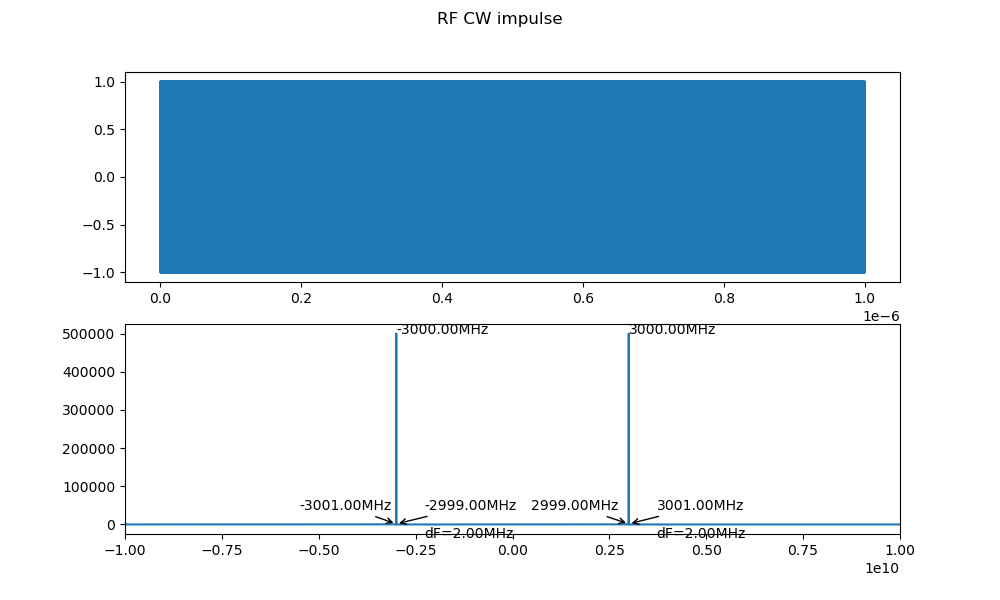

In [3]:
# create the CW impulse
rf = np.zeros(t.shape)
rf[s:e] = np.sin(2*np.pi*f0*t[s:e])
pd.plot_with_spectre(rf, fs, "RF CW impulse")



In [4]:
# create the freq modulated impulse
f = np.linspace(f0-delta_f/2, f0+delta_f/2, L)
rf = np.zeros(t.shape)
rf[s:e] = np.sin(2*np.pi*f*t[s:e])
pd.plot_with_spectre(rf, fs, "RF modulated impulse")



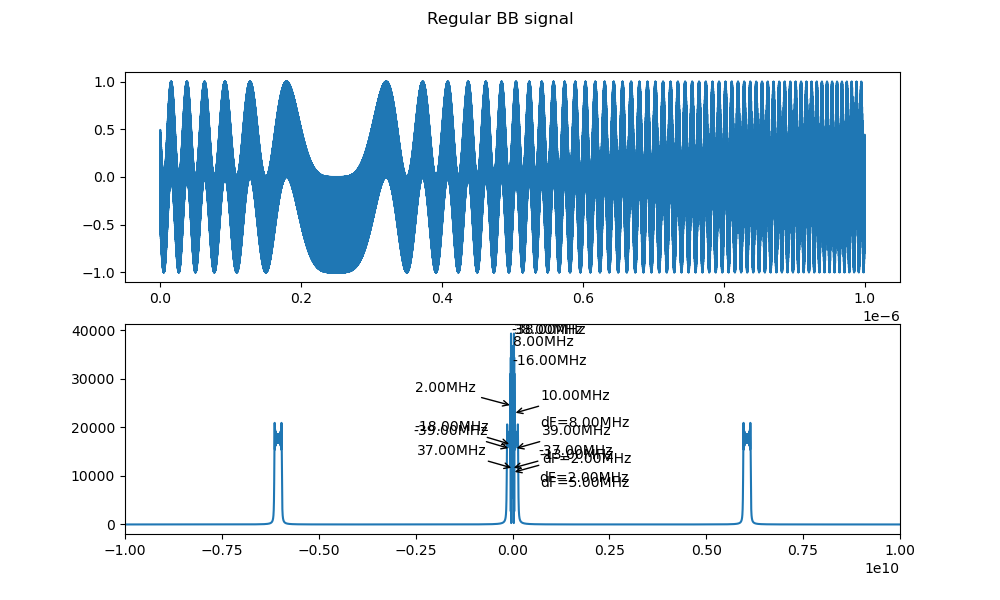

In [5]:
# now let's try to make regular down conversion
bs1 = rf * np.cos(2*np.pi*f0*t)
pd.plot_with_spectre(bs1, fs, "Regular BB signal")



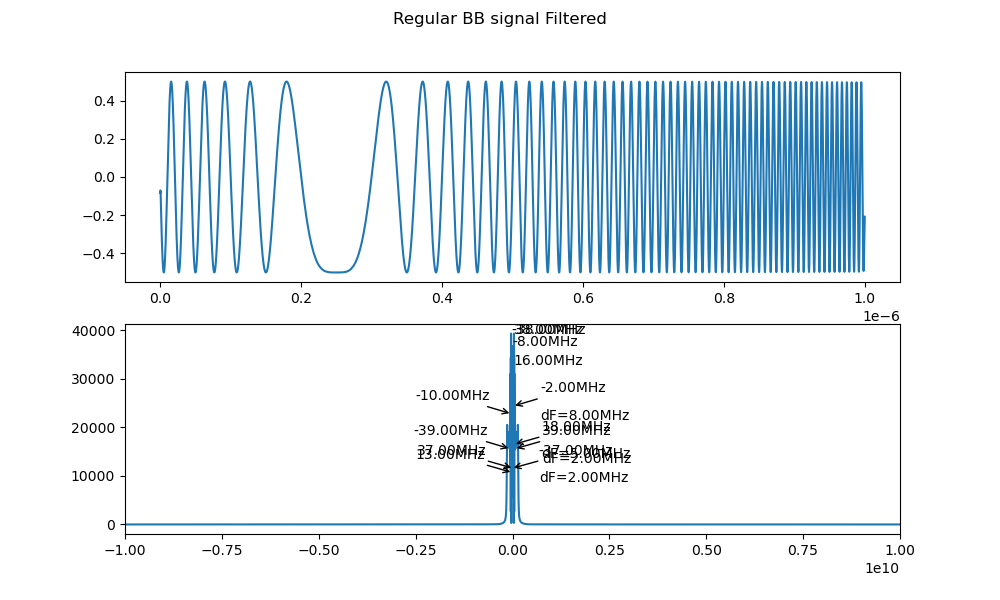

In [6]:
# filter the highs
bs2 = pd.butter_lowpass_filter(bs1, fs, 500*10**6, 2)
pd.plot_with_spectre(bs2, fs, "Regular BB signal Filtered")



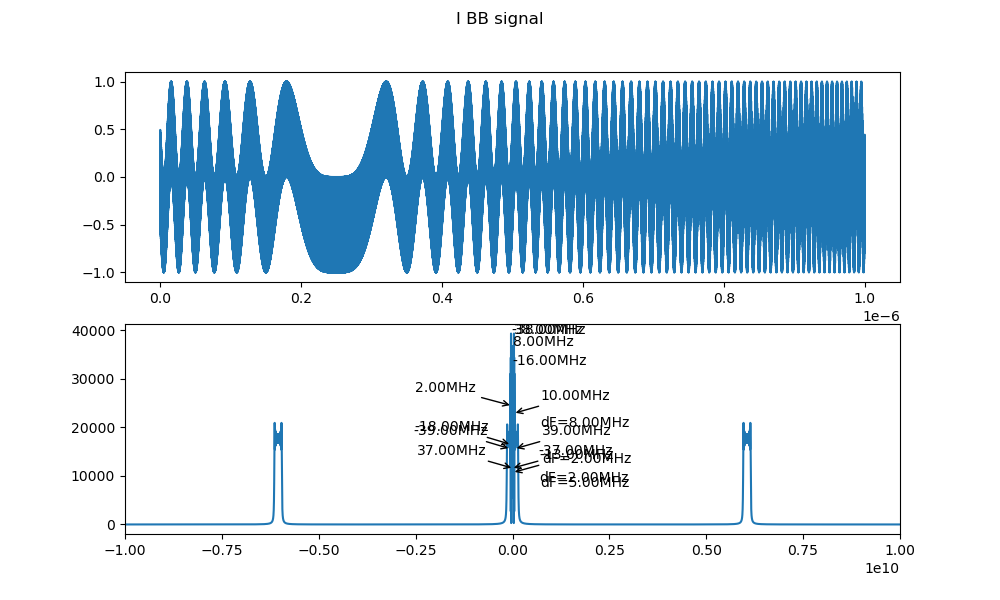

In [7]:
# apply IQ demodulation
I_bs = rf * np.cos(2*np.pi*f0*t)
pd.plot_with_spectre(I_bs, fs, "I BB signal")


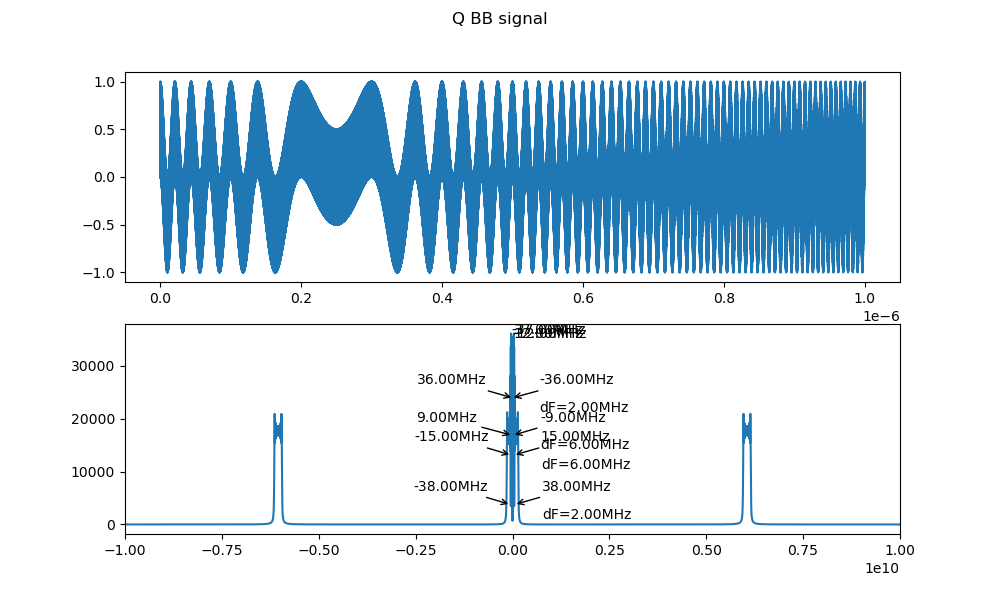

In [8]:
Q_bs = rf * np.sin(2*np.pi*f0*t)
pd.plot_with_spectre(Q_bs, fs, "Q BB signal")

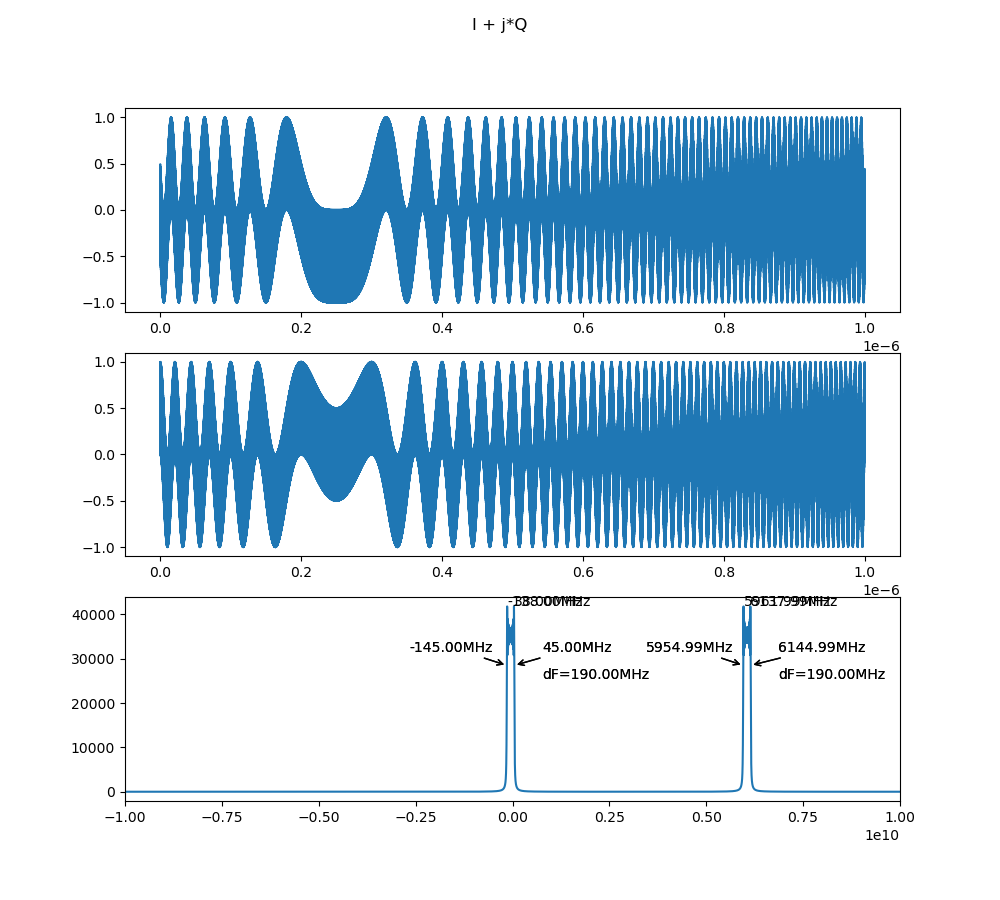

In [9]:
IQ_bs = I_bs + 1j*Q_bs
pd.plot_with_spectre(IQ_bs, fs, "I + j*Q")

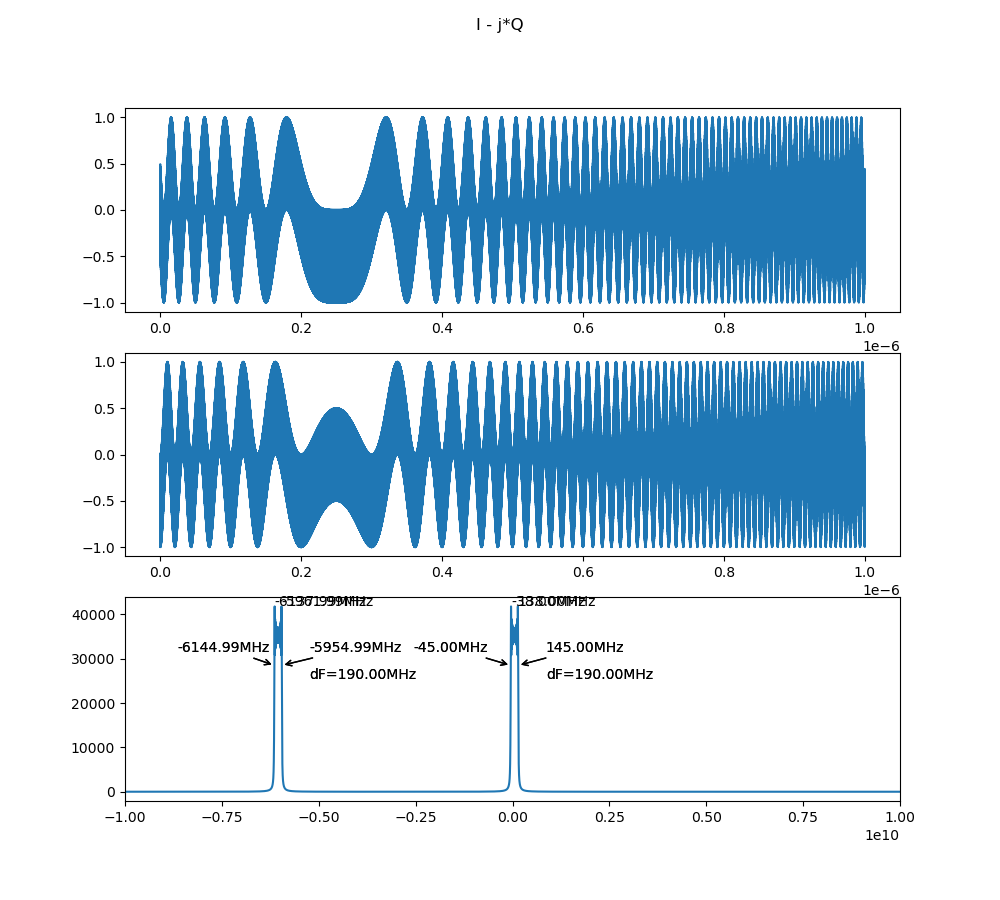

In [10]:
IQ_bs2 = I_bs - 1j*Q_bs
pd.plot_with_spectre(IQ_bs2, fs, "I - j*Q")